In [1]:
import plotly as plty
from plotly import express as px
from plotly import graph_objects as go
import plotly.figure_factory as ff
import pandas as pd 
cmap = px.colors.diverging.Spectral
from google.colab import drive
root = "/content/drive"
drive.mount(root)
import os 
os.chdir("/content/drive/My Drive/combustion data")
import pandas as pd 
os.chdir("PCAfold")
os.listdir()
!python setup.py build_ext --inplace
!python setup.py install
from PCAfold import PCA
from PCAfold import preprocess
from PCAfold import reduction
from PCAfold import analysis
from PCAfold import KReg
import numpy as np
import matplotlib.pyplot as plt
import pickle
import multiprocessing as multiproc
!pip install faiss-gpu
!apt-get install libomp-dev
import faiss 

Mounted at /content/drive
running build_ext
running install
running build
running build_py
running build_ext
running install_lib
creating /usr/local/lib/python3.7/dist-packages/PCAfold
copying build/lib.linux-x86_64-3.7/PCAfold/styles.py -> /usr/local/lib/python3.7/dist-packages/PCAfold
copying build/lib.linux-x86_64-3.7/PCAfold/reduction.py -> /usr/local/lib/python3.7/dist-packages/PCAfold
copying build/lib.linux-x86_64-3.7/PCAfold/analysis.py -> /usr/local/lib/python3.7/dist-packages/PCAfold
copying build/lib.linux-x86_64-3.7/PCAfold/__init__.py -> /usr/local/lib/python3.7/dist-packages/PCAfold
copying build/lib.linux-x86_64-3.7/PCAfold/preprocess.py -> /usr/local/lib/python3.7/dist-packages/PCAfold
copying build/lib.linux-x86_64-3.7/PCAfold/kernel_regression.cpython-37m-x86_64-linux-gnu.so -> /usr/local/lib/python3.7/dist-packages/PCAfold
byte-compiling /usr/local/lib/python3.7/dist-packages/PCAfold/styles.py to styles.cpython-37.pyc
byte-compiling /usr/local/lib/python3.7/dist-pack

In [4]:
%run -i gpr.py
%run -i dml.py

In [5]:
src_p = "transient-h2-burke-flamelet-source.p"
state_p = "transient-h2-burke-flamelet-state.p" 
X_scaled, S_X_scaled = preprocess_data(src_p, state_p, 3, "pareto", False)

['T', 'H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2']


In [6]:
m1 = np.loadtxt("h2_burke_transient_dml_1.csv", delimiter= ",")
from sklearn import preprocessing
transformed_mat = X_scaled @ np.real(m1)
transformed_mat = transformed_mat.astype(np.float32)
transformed_mat, Idx = np.unique(transformed_mat, return_index = True , axis = 0)
transformed_srcs = S_X_scaled @ np.real(m1) 
transformed_srcs = transformed_srcs[Idx,:]

In [7]:
v_y = singular_kernel_average(transformed_mat,transformed_srcs,3, singular_kernel_minus)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


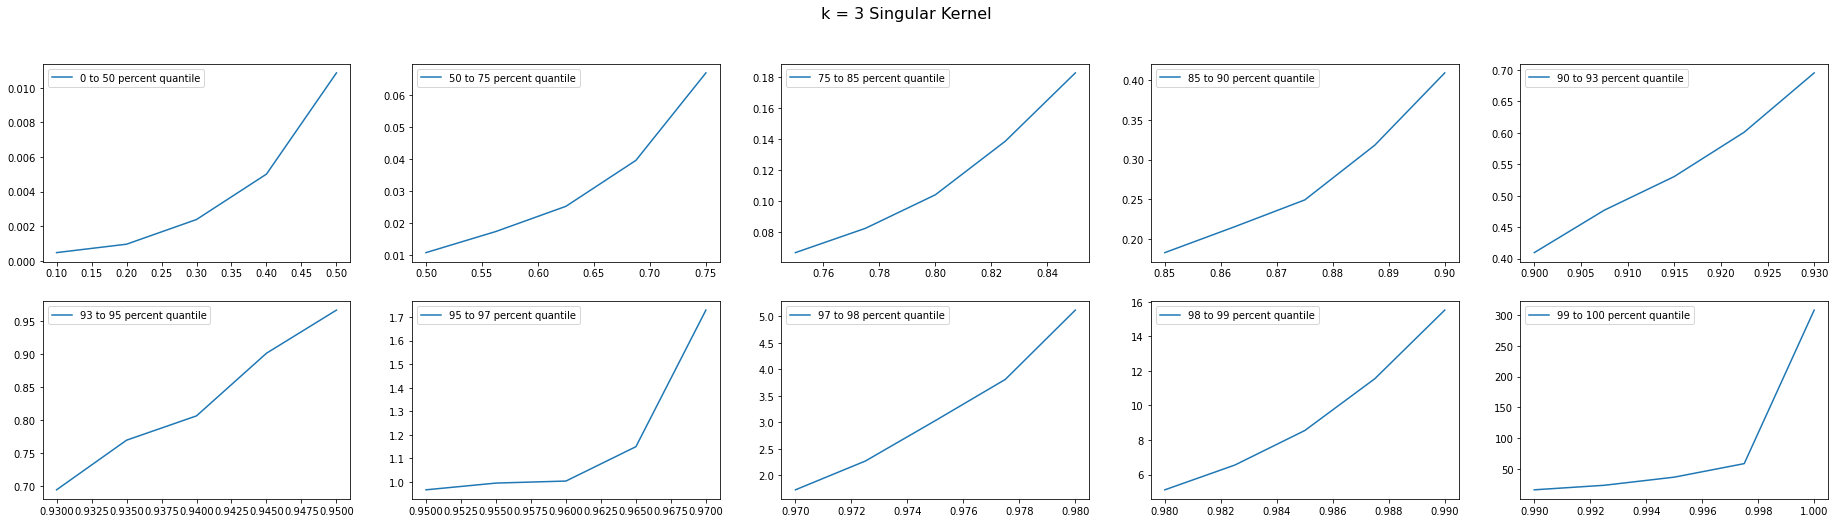

In [8]:
fig, axs = plt.subplots(2,5, figsize = (32,8))
axs[0,0].plot(np.linspace(0.1, 0.5, 5), np.quantile(v_y, np.linspace(0.1, 0.5, 5)), label = "0 to 50 percent quantile")
axs[0,0].legend()
axs[0,1].plot(np.linspace(0.5, 0.75, 5), np.quantile(v_y, np.linspace(0.5, 0.75, 5)), label = "50 to 75 percent quantile")
axs[0,1].legend()
axs[0,2].plot(np.linspace(0.75, 0.85, 5), np.quantile(v_y, np.linspace(0.75, 0.85, 5)), label = "75 to 85 percent quantile")
axs[0,2].legend()
axs[0,3].plot(np.linspace(0.85, 0.90, 5), np.quantile(v_y, np.linspace(0.85, 0.90, 5)), label = "85 to 90 percent quantile")
axs[0,3].legend()
axs[0,4].plot(np.linspace(0.9, 0.93, 5), np.quantile(v_y, np.linspace(0.9, 0.93, 5)), label = "90 to 93 percent quantile")
axs[0,4].legend()
fig.suptitle('k = 3 Singular Kernel', fontsize=16)
axs[1,0].plot(np.linspace(0.93, 0.95, 5), np.quantile(v_y, np.linspace(0.93, 0.95, 5)), label = "93 to 95 percent quantile")
axs[1,0].legend()
axs[1,1].plot(np.linspace(0.95, 0.97, 5), np.quantile(v_y, np.linspace(0.95, 0.97, 5)), label = "95 to 97 percent quantile")
axs[1,1].legend()
axs[1,2].plot(np.linspace(0.97, 0.98, 5), np.quantile(v_y, np.linspace(0.97, 0.98, 5)), label = "97 to 98 percent quantile")
axs[1,2].legend()
axs[1,3].plot(np.linspace(0.98, 0.99, 5), np.quantile(v_y, np.linspace(0.98, 0.99, 5)), label = "98 to 99 percent quantile")
axs[1,3].legend()
axs[1,4].plot(np.linspace(0.99, 1, 5), np.quantile(v_y, np.linspace(0.99, 1, 5)), label = "99 to 100 percent quantile")
axs[1,4].legend()


In [9]:
v_y_1 = knn_gpr_average(transformed_mat,transformed_srcs,4)

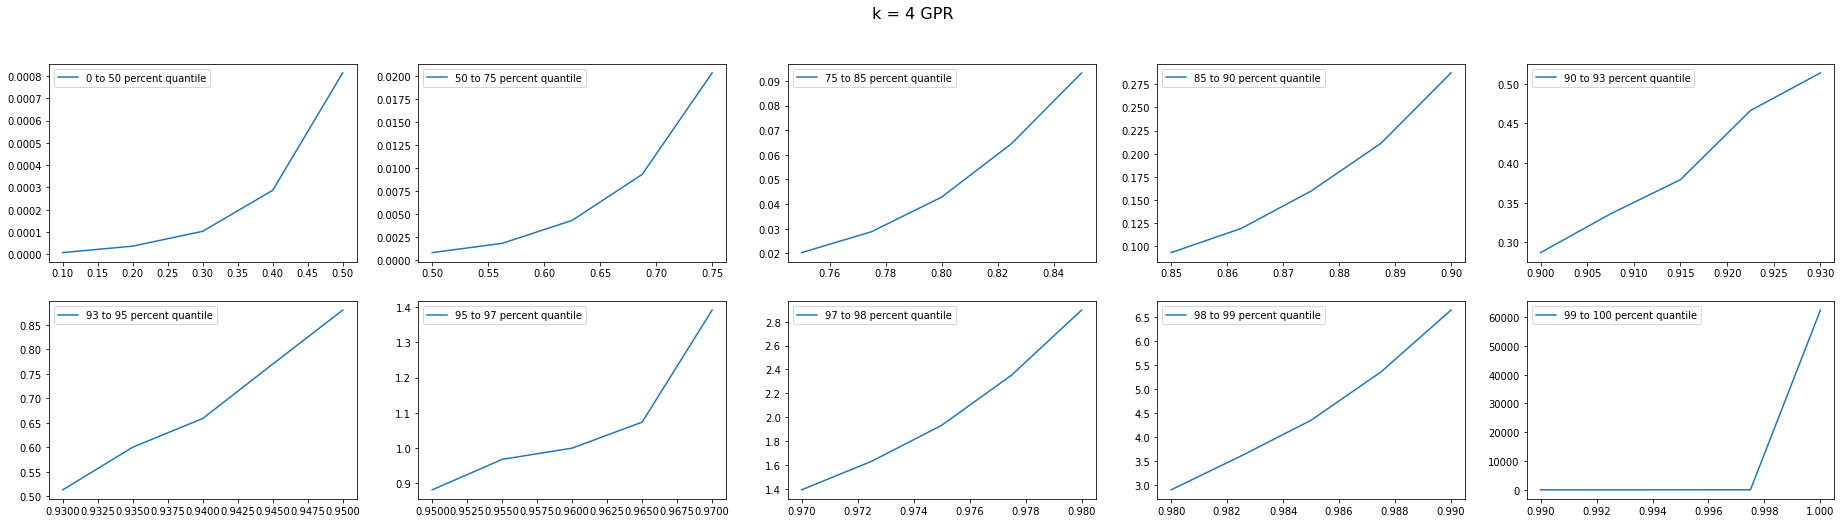

In [10]:
fig, axs = plt.subplots(2,5, figsize = (32,8))
axs[0,0].plot(np.linspace(0.1, 0.5, 5), np.quantile(v_y_1, np.linspace(0.1, 0.5, 5)), label = "0 to 50 percent quantile")
axs[0,0].legend()
axs[0,1].plot(np.linspace(0.5, 0.75, 5), np.quantile(v_y_1, np.linspace(0.5, 0.75, 5)), label = "50 to 75 percent quantile")
axs[0,1].legend()
axs[0,2].plot(np.linspace(0.75, 0.85, 5), np.quantile(v_y_1, np.linspace(0.75, 0.85, 5)), label = "75 to 85 percent quantile")
axs[0,2].legend()
axs[0,3].plot(np.linspace(0.85, 0.90, 5), np.quantile(v_y_1, np.linspace(0.85, 0.90, 5)), label = "85 to 90 percent quantile")
axs[0,3].legend()
axs[0,4].plot(np.linspace(0.9, 0.93, 5), np.quantile(v_y_1, np.linspace(0.9, 0.93, 5)), label = "90 to 93 percent quantile")
axs[0,4].legend()
fig.suptitle('k = 4 GPR', fontsize=16)
axs[1,0].plot(np.linspace(0.93, 0.95, 5), np.quantile(v_y_1, np.linspace(0.93, 0.95, 5)), label = "93 to 95 percent quantile")
axs[1,0].legend()
axs[1,1].plot(np.linspace(0.95, 0.97, 5), np.quantile(v_y_1, np.linspace(0.95, 0.97, 5)), label = "95 to 97 percent quantile")
axs[1,1].legend()
axs[1,2].plot(np.linspace(0.97, 0.98, 5), np.quantile(v_y_1, np.linspace(0.97, 0.98, 5)), label = "97 to 98 percent quantile")
axs[1,2].legend()
axs[1,3].plot(np.linspace(0.98, 0.99, 5), np.quantile(v_y_1, np.linspace(0.98, 0.99, 5)), label = "98 to 99 percent quantile")
axs[1,3].legend()
axs[1,4].plot(np.linspace(0.99, 1, 5), np.quantile(v_y_1, np.linspace(0.99, 1, 5)), label = "99 to 100 percent quantile")
axs[1,4].legend()
